# Detecting Emotion with Azure Cognitive Services

Azure Cognitive Services (ACS) provides an API for analyzing images and detecting the emotions on faces in those images. This notebook uses that service to produce a report of the dominant emotion detected on each face in any image provided by a link to that image.

## Imports

First, you must import the packages necessary for this demonstration. You can run code in this notebook by pressing `Shift`+`Enter` when your cursor is in the cell. We will be doing this a lot in this demonstration. Try it by clicking in the cell below and running the code. It should print "All imports were successful".

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import key_handler
import json

from PIL import Image
from matplotlib import patches
from io import BytesIO
import requests

print("All imports were successful!")

All imports were successful!


## Connect to Azure Cognitive Services

This demonstration connects to a RESTful ACS endpoint. The `api_url` is the general endpoint for all ACS services, you append `/face/v1.0/detect` to tell ACS which service you want to use.

In [2]:
api_url = 'https://australiaeast.api.cognitive.microsoft.com'
face_detect_endpoint_url = api_url + '/face/v1.0/detect'

## Set Example Images

We have selected some example images for you to test emotion recognition. You can also

In [3]:
example_0 = 'https://i.imgur.com/aegNK4W.jpg'
example_1 = 'https://i.imgur.com/RLSN9rx.jpg'
example_2 = 'https://i.imgur.com/vEuLg5n.jpg'

## Create the Emotion Analysis Function

The function below uses the `requests` package to make an HTTP call to the ACS API. It returns a `JSON` with the position of faces in the image and their emotions.

In [4]:
def analyze_image(image_url):
    """
    Calls to the Azure Cognitive Services Face Recognition API.
    Returns a list of json, one for each face with positions in the image and their emotions.
    """
    response = requests.post(
        face_detect_endpoint_url, 
        params={'returnFaceAttributes': 'emotion'}, 
        headers={'Ocp-Apim-Subscription-Key': key_handler.get_api_key()}, 
        json={"url": image_url}
    )
    return response.json()

Run this cell to see the raw output returned from the API. Change the `image_url` to an image of your choice to see what ACS returns.

In [5]:
image_url = example_0
faces = analyze_image(image_url)
print(analyze_image(image_url))

[{'faceId': 'e5d2b596-9ec1-48ef-b812-fa008ffa925e', 'faceRectangle': {'top': 979, 'left': 596, 'width': 681, 'height': 681}, 'faceAttributes': {'emotion': {'anger': 0.001, 'contempt': 0.025, 'disgust': 0.043, 'fear': 0.001, 'happiness': 0.02, 'neutral': 0.019, 'sadness': 0.892, 'surprise': 0.0}}}]


## Annotate the Images

This function makes use of the `analyze_image` function from above to plot the image with and overlay of faces and the dominant emotion detected.

In [6]:
def annotate_faces(image_url):
    faces = analyze_image(image_url)
    
    # Save download the image for plotting.
    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    # Plot the base image
    plt.figure(figsize=(18,18))
    plt.text(0,0,f'{len(faces)} faces')
    ax = plt.imshow(image, alpha=0.8)
    
    # Annotate each face returned by Azure Cognitive Services
    for face in faces:
        detected_emotions = face['faceAttributes']['emotion']
        dominant_emotion = max(detected_emotions, key=detected_emotions.get).capitalize()
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(
            origin, 
            fr["width"],
            fr["height"], 
            fill=False,
            linewidth=2, 
            color='w')
        ax.axes.add_patch(p)
        plt.text(
            origin[0], 
            origin[1], 
            f'{dominant_emotion}',
            fontsize=18, 
            weight="normal", 
            va="bottom",
            backgroundcolor='w'
        )
    plt.axis("off")

## Try it Yourself

You can run the code to produce anotated images by calling `annotate_faces` with an image url as an argument. Try it with any image url you find!

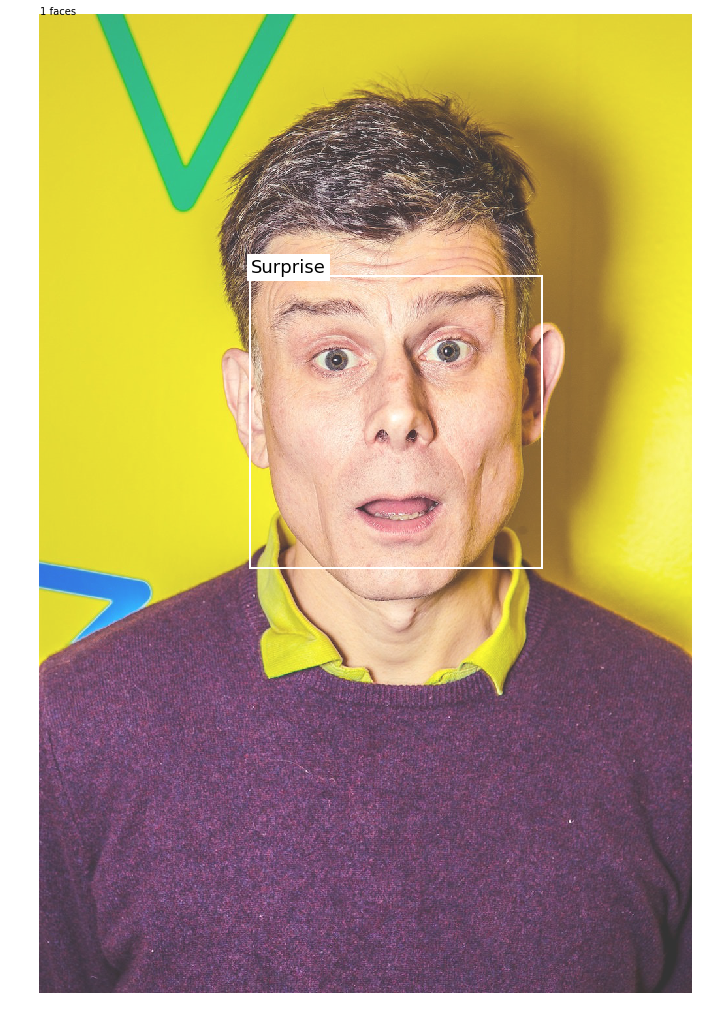

In [22]:
annotate_faces(example_1)

## Exploring Other Cognitive Services API

Explore the [directory](https://azure.microsoft.com/en-us/services/cognitive-services/directory/) of Cognitive Service APIs to learn more. 